In [154]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
warnings.filterwarnings("ignore")


In [155]:
data=pd.read_csv("01.Data Cleaning and Preprocessing.csv")

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Observation      324 non-null    object 
 1   Y-Kappa          324 non-null    float64
 2   ChipRate         319 non-null    float64
 3   BF-CMratio       307 non-null    float64
 4   BlowFlow         308 non-null    float64
 5   ChipLevel4       323 non-null    float64
 6   T-upperExt-2     322 non-null    float64
 7   T-lowerExt-2     322 non-null    float64
 8   UCZAA            299 non-null    float64
 9   WhiteFlow-4      323 non-null    float64
 10  AAWhiteSt-4      173 non-null    float64
 11  AA-Wood-4        323 non-null    float64
 12  ChipMoisture-4   323 non-null    float64
 13  SteamFlow-4      323 non-null    float64
 14  Lower-HeatT-3    322 non-null    float64
 15  Upper-HeatT-3    322 non-null    float64
 16  ChipMass-4       323 non-null    float64
 17  WeakLiquorF     

In [157]:
print(data.isna().sum())

Observation          0
Y-Kappa              0
ChipRate             5
BF-CMratio          17
BlowFlow            16
ChipLevel4           1
T-upperExt-2         2
T-lowerExt-2         2
UCZAA               25
WhiteFlow-4          1
AAWhiteSt-4        151
AA-Wood-4            1
ChipMoisture-4       1
SteamFlow-4          1
Lower-HeatT-3        2
Upper-HeatT-3        2
ChipMass-4           1
WeakLiquorF          1
BlackFlow-2          2
WeakWashF            1
SteamHeatF-3         2
T-Top-Chips-4        1
SulphidityL-4      151
dtype: int64


In [158]:
print(data.isnull().sum()/len(data)*100)

Observation         0.000000
Y-Kappa             0.000000
ChipRate            1.543210
BF-CMratio          5.246914
BlowFlow            4.938272
ChipLevel4          0.308642
T-upperExt-2        0.617284
T-lowerExt-2        0.617284
UCZAA               7.716049
WhiteFlow-4         0.308642
AAWhiteSt-4        46.604938
AA-Wood-4           0.308642
ChipMoisture-4      0.308642
SteamFlow-4         0.308642
Lower-HeatT-3       0.617284
Upper-HeatT-3       0.617284
ChipMass-4          0.308642
WeakLiquorF         0.308642
BlackFlow-2         0.617284
WeakWashF           0.308642
SteamHeatF-3        0.617284
T-Top-Chips-4       0.308642
SulphidityL-4      46.604938
dtype: float64


In [159]:
data=data.apply(lambda x: x.str.strip() if x.dtype=='object' else x)
data.columns=data.columns.str.strip()
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

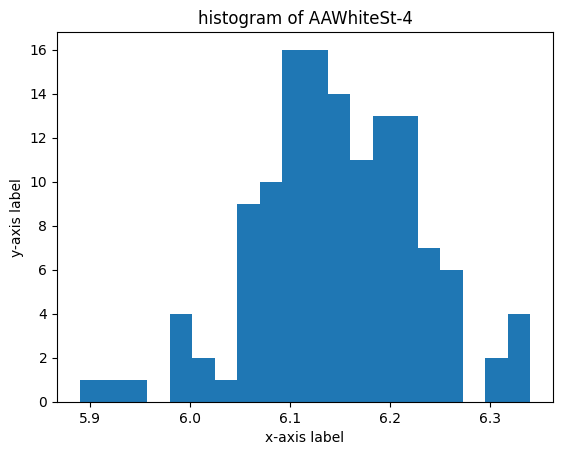

In [160]:
plt.hist(data['AAWhiteSt-4'],bins=20)
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')
plt.title('histogram of AAWhiteSt-4')
plt.show

In [161]:
data.describe()
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AAWhiteSt-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,...,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,20.665725,14.395328,86.793969,1240.197595,265.495664,356.834206,324.133267,1.497626,595.079710,6.146672,...,67.180282,325.265771,300.264160,162.279008,865.121061,1163.291947,273.059489,49.468351,251.266290,30.497626
std,3.021990,1.496178,7.533255,72.375493,81.847426,9.403771,7.847815,0.106500,68.208005,0.081359,...,5.548357,4.588467,4.578489,14.353163,126.237074,150.955336,158.311244,4.706549,1.276348,0.657965
min,12.170000,10.833000,68.645000,954.092000,0.000000,340.222000,287.705000,1.182000,405.111000,5.890000,...,51.192000,318.821000,293.312000,113.922000,493.856000,838.948000,0.000000,35.510000,248.390000,29.020000
25%,18.490000,13.481000,81.164500,1198.625500,220.354000,350.338000,321.453000,1.437000,542.125000,6.096000,...,63.780500,321.282500,296.566500,153.032500,769.505500,1017.102500,151.810000,46.520000,250.307000,30.155000
50%,20.700000,14.417000,86.950000,1272.030000,274.516000,357.520000,325.690000,1.500000,596.506000,6.140000,...,68.023000,322.913000,298.517000,163.067000,860.372000,1141.946000,284.877000,49.987000,251.406000,30.400000
75%,23.185000,15.529500,92.024500,1289.225000,332.497000,362.392500,329.433500,1.566000,652.506500,6.200000,...,71.791500,329.821000,304.089500,173.134000,967.372000,1313.741500,396.471500,52.683000,252.423000,30.920000
max,27.600000,16.817000,114.570000,1334.892000,419.014000,399.135000,333.706000,1.747000,731.394000,6.340000,...,76.147000,333.596000,310.487000,187.665000,1132.181000,1392.868000,598.171000,63.332000,254.122000,32.840000


In [162]:
data.to_csv("cleaned_dataset.csv",index=False)

PermissionError: [Errno 13] Permission denied: 'cleaned_dataset.csv'